In [1]:
import networkx as nx
import math
import numpy as np
import matplotlib as mat
import matplotlib.pyplot as plt 
import random
%matplotlib inline

In [2]:
# plot settings
almost_black = '#262626'
plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['axes.edgecolor'] = almost_black
plt.rcParams['text.color'] = almost_black
plt.rcParams['axes.linewidth'] = 0.5
plt.rcParams['axes.labelsize'] = 12

Implement an information cascade model, in which the probability of node i activating node j is proportional to the weight of the edge from i to j.

In [3]:
def information_cascade(G,t_tot,init):
    
    t = 0
    
    max_weight = max([e[2]['weight'] for e in G.edges(data=True)])
    
    activation_times = {}
    for i in init:
        activation_times[i]=0
    
    while t<t_tot:
    
        curr_infectious = [n for n in activation_times if activation_times[n]==t]

        for n in curr_infectious:
            for m in G.neighbors(n):
                if m not in activation_times.keys():
                    p = G[n][m]['weight']
                    if p>random.uniform(0,1)*max_weight:
                        activation_times[m] = t+1
                        
        t+=1

    return activation_times
    

# Selecting the Initial activation nodes

In [33]:
import pandas as pd

In [34]:
nodes = pd.read_csv("../nodes_with_metadata.csv")

In [35]:
nodes.head()

,Id,Label,timeset,communityid,twittername,first name,last name,political affiliation,indegree,outdegree,degree,eigencentrality,community,polygon
0,1417929933800751104,NaN,NaN,1,NaN,NaN,NaN,NaN,0,1,1,0.0,Liberal,1
1,1052290795942731777,NaN,NaN,1,NaN,NaN,NaN,NaN,0,1,1,0.0,Liberal,1
2,1247907027650838528,NaN,NaN,1,NaN,NaN,NaN,NaN,0,1,1,0.0,Liberal,1
3,1103476860187369472,NaN,NaN,1,NaN,NaN,NaN,NaN,0,1,1,0.0,Liberal,1
4,998590102573023232,NaN,NaN,1,NaN,NaN,NaN,NaN,0,1,1,0.0,Liberal,1


In [36]:
retweeting_activists_mps = nodes.dropna(subset=["political affiliation"])

In [37]:
retweeting_activists_mps.head()

,Id,Label,timeset,communityid,twittername,first name,last name,political affiliation,indegree,outdegree,degree,eigencentrality,community,polygon
21,86384661,NaN,NaN,1,Yasir_Naqvi,Yasir,Naqvi,Liberal,132,0,132,0.230067,Liberal,6
25,2344419362,NaN,NaN,1,SalmaZahid15,Salma,Zahid,Liberal,75,3,78,0.169595,Liberal,6
61,170377354,NaN,NaN,1,AnthonyRota,Anthony,Rota,Liberal,5,0,5,0.012606,Liberal,6
79,2942312619,NaN,NaN,1,YRobillardPLC,Yves,Robillard,Liberal,1,0,1,0.000000,Liberal,6
120,3242606862,NaN,NaN,1,MMcLeodNWT,Michael,McLeod,Liberal,19,1,20,0.040971,Liberal,6


In [38]:
retweeting_activists_mps.describe()

,Id,Label,timeset,communityid,indegree,outdegree,degree,eigencentrality,polygon
count,2.770000e+02,0.0,0.0,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000
mean,1.669641e+17,NaN,NaN,2.833935,50.685921,0.584838,51.270758,0.131738,5.393502
std,4.086269e+17,NaN,NaN,3.159046,57.596034,1.214729,57.906180,0.177564,1.207027
min,3.358671e+06,NaN,NaN,1.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,1.580958e+08,NaN,NaN,1.000000,11.000000,0.000000,11.000000,0.012606,6.000000
50%,4.173898e+08,NaN,NaN,2.000000,30.000000,0.000000,31.000000,0.059880,6.000000
75%,2.874773e+09,NaN,NaN,3.000000,68.000000,1.000000,69.000000,0.170186,6.000000
max,1.427259e+18,NaN,NaN,21.000000,378.000000,8.000000,381.000000,1.000000,6.000000


In [39]:
retweeting_activists_mps = retweeting_activists_mps[retweeting_activists_mps["outdegree"] > 0]

In [40]:
retweeting_activists_mps.head()

,Id,Label,timeset,communityid,twittername,first name,last name,political affiliation,indegree,outdegree,degree,eigencentrality,community,polygon
25,2344419362,NaN,NaN,1,SalmaZahid15,Salma,Zahid,Liberal,75,3,78,0.169595,Liberal,6
120,3242606862,NaN,NaN,1,MMcLeodNWT,Michael,McLeod,Liberal,19,1,20,0.040971,Liberal,6
152,360677740,NaN,NaN,1,lisahepfner2021,Lisa,Hepfner,Liberal,72,1,73,0.157580,Liberal,6
364,25813888,NaN,NaN,1,NaN,NaN,NaN,Activist Organization,47,1,48,0.034668,Liberal,3
519,2322580746,NaN,NaN,1,jimcarr_wpg,Jim,Carr,Liberal,7,1,8,0.012606,Liberal,6


In [41]:
retweeting_activists_mps.describe()

,Id,Label,timeset,communityid,indegree,outdegree,degree,eigencentrality,polygon
count,8.100000e+01,0.0,0.0,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,1.940011e+17,NaN,NaN,1.839506,72.148148,2.000000,74.148148,0.228402,5.740741
std,4.506026e+17,NaN,NaN,1.156036,67.549817,1.491643,67.799541,0.219144,0.848201
min,1.601440e+07,NaN,NaN,1.000000,0.000000,1.000000,1.000000,0.000000,3.000000
25%,2.345509e+08,NaN,NaN,1.000000,22.000000,1.000000,24.000000,0.059880,6.000000
50%,4.880522e+08,NaN,NaN,1.000000,54.000000,1.000000,55.000000,0.162127,6.000000
75%,2.891741e+09,NaN,NaN,3.000000,97.000000,3.000000,102.000000,0.330466,6.000000
max,1.427259e+18,NaN,NaN,5.000000,378.000000,8.000000,381.000000,1.000000,6.000000


In [42]:
len(retweeting_activists_mps["outdegree"])

81

## Selecting the targets from the edges

In [43]:
edges = pd.read_csv("../Null Model Comparison/largest_component_networkx_format.csv", names=["Source", "Target", "Weight"])

In [44]:
edges.head()

,Source,Target,Weight
0,1385933370090209280,158095776,"{""weight"":1}"
1,1416535505454338050,158095776,"{""weight"":8}"
2,1416535505454338050,1604931252,"{""weight"":1}"
3,544695802,158095776,"{""weight"":1}"
4,716257068538327040,158095776,"{""weight"":1}"


In [45]:
relevant_paths = pd.merge(edges, retweeting_activists_mps, left_on='Source', right_on='Id')

In [46]:
relevant_paths.head()

,Source,Target,Weight,Id,Label,timeset,communityid,twittername,first name,last name,political affiliation,indegree,outdegree,degree,eigencentrality,community,polygon
0,150270263,18681111,"{""weight"":1}",150270263,NaN,NaN,1,NaN,NaN,NaN,Activist Organization,30,1,31,0.037561,Liberal,3
1,29545977,59686058,"{""weight"":1}",29545977,NaN,NaN,2,NaN,NaN,NaN,Activist Organization,7,1,8,0.006303,NDP,3
2,25813888,150270263,"{""weight"":1}",25813888,NaN,NaN,1,NaN,NaN,NaN,Activist Organization,47,1,48,0.034668,Liberal,3
3,577727470,119925381,"{""weight"":1}",577727470,NaN,NaN,2,NaN,NaN,NaN,Activist Organization,45,1,46,0.031516,NDP,3
4,294660973,294660973,"{""weight"":1}",294660973,NaN,NaN,5,NaN,NaN,NaN,Activist Organization,63,1,64,0.014769,LGBTQ2S+,3


In [47]:
activation_nodes = relevant_paths['Target'].unique()

In [48]:
activation_nodes

array([           18681111,            59686058,           150270263,
                 119925381,           294660973,            14079041,
                  17969963,          2715275551,           377588094,
       1342125115383939073,           273262205,            24990450,
                3025416359, 1425866189780160514,          2530008414,
                2800741820,            16014404, 1063494232126689280,
                 408072407,           234550882,          3402128080,
                 803381983,           261772246,           417389780,
       1170770038208565248,          1707636642, 1143229947932229632,
                2254171724,          2555308646,           739149720,
        989311745100566529,           268832287,  883774859452579840,
                  15810950,           129395750,  791282631006621696,
                 256552850, 1086084557009575936,            36133644,
                  34606493,           564207331,           414218319,
        943174774154

In [49]:
len(activation_nodes)

91

In [50]:
df = pd.DataFrame(data=activation_nodes, columns=["id"])


In [51]:
activation_nodes_profile_df = pd.merge(df, nodes, how="inner", left_on="id", right_on="Id")
activation_nodes_profile_df

,id,Id,Label,timeset,communityid,twittername,first name,last name,political affiliation,indegree,outdegree,degree,eigencentrality,community,polygon
0,18681111,18681111,NaN,NaN,2,NaN,NaN,NaN,Activist Organization,46,0,46,0.025898,NDP,3
1,59686058,59686058,NaN,NaN,2,NaN,NaN,NaN,Activist Organization,11,0,11,0.021728,NDP,3
2,150270263,150270263,NaN,NaN,1,NaN,NaN,NaN,Activist Organization,30,1,31,0.037561,Liberal,3
3,119925381,119925381,NaN,NaN,5,NaN,NaN,NaN,Activist Organization,108,0,108,0.080274,LGBTQ2S+,3
4,294660973,294660973,NaN,NaN,5,NaN,NaN,NaN,Activist Organization,63,1,64,0.014769,LGBTQ2S+,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,165812196,165812196,NaN,NaN,1,stevenmackinnon,Steven,MacKinnon,Liberal,5,0,5,0.010864,Liberal,6
87,175259033,175259033,NaN,NaN,2,taylorbachrach,Taylor,Bachrach,NDP,60,0,60,0.463605,NDP,6
88,215632349,215632349,NaN,NaN,2,CharlieAngusNDP,Charlie,Angus,NDP,378,3,381,0.657356,NDP,6
89,341866567,341866567,NaN,NaN,2,LoriIdlout,Lori,Idlout,NDP,67,2,69,0.456031,NDP,6


In [53]:
activation_nodes_profile_df.to_csv("activation_nodes.csv")

Run a Groupby so we can Randomly pick a subset of nodes to run our diffusion on from one community 

In [55]:
activation_community_groups = activation_nodes_profile_df.groupby("community")

In [59]:
activation_community_groups.groups

{'Bloc Québécois': [9, 10, 11, 12, 13, 14, 15, 16, 17, 20, 21, 22, 26], 'Conservative': [6, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43], 'LGBTQ2S+': [3, 4], 'Liberal': [2, 18, 19, 23, 24, 25, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86], 'NDP': [0, 1, 5, 7, 8, 87, 88, 89, 90]}

# Preparing Edges

The edges in this network are going to be flipped so we can let information be travel down to those the person was retweeted by

In [21]:
edges.head()

,Source,Target,Weight
0,1385933370090209280,158095776,"{""weight"":1}"
1,1416535505454338050,158095776,"{""weight"":8}"
2,1416535505454338050,1604931252,"{""weight"":1}"
3,544695802,158095776,"{""weight"":1}"
4,716257068538327040,158095776,"{""weight"":1}"


In [22]:
edges = edges[['Target', 'Source', 'Weight']]

In [23]:
edges 


,Target,Source,Weight
0,158095776,1385933370090209280,"{""weight"":1}"
1,158095776,1416535505454338050,"{""weight"":8}"
2,1604931252,1416535505454338050,"{""weight"":1}"
3,158095776,544695802,"{""weight"":1}"
4,158095776,716257068538327040,"{""weight"":1}"
...,...,...,...
13996,196717787,77596220,"{""weight"":1}"
13997,196717787,891058415195303939,"{""weight"":1}"
13998,196717787,1095768409449459712,"{""weight"":1}"
13999,196717787,881426857,"{""weight"":1}"


In [24]:
edges = edges.set_index("Target")

In [25]:
edges.to_csv("Source_retweeted_by_target.csv")

# Running an information cascade 

In [60]:
G = nx.read_edgelist('Source_retweeted_by_target.csv', comments='#',
                     create_using=nx.DiGraph(), 
                     delimiter=','"", 
                     nodetype=int, 
                     encoding='utf-8')

Running an initial cascade, starting with the nodes where the path lengths are going to be more than 1 
- G: the Graph with the edges reversed to allow for information to flow down to the retweeters
- Time: let this initally be 4 to see what we get with little spread
- activation nodes: These are the nodes where another MP or activist organization has retweeted them

### Liberal Experiment

In [75]:
len(activation_community_groups.get_group("Liberal")['id'].tolist())

49

In [76]:
liberal_starters = random.sample(activation_community_groups.get_group("Liberal")['id'].tolist(), 2)

In [77]:
liberal_starters

[22849568, 2891740872]

^ These are the starting nodes ^

In [82]:
t5 = information_cascade(G,5,liberal_starters)

In [241]:
experiments = []
for i in range(1,1000):
    t5 = information_cascade(G,5,liberal_starters)
    experiment = pd.DataFrame.from_dict(t5, orient='index',
                       columns=[ "activation_time_exp_{}".format(i)])
    experiments.append(experiment)

In [242]:
experiments_df = experiments[0]

for i in range (1, 999):
    experiments_df = pd.merge(experiments[i], experiments_df, left_index=True, right_index=True, how='outer')

In [243]:
experiments_df['average_activation_time'] = experiments_df.mean(axis=1)
experiments_df['average_activation_time'] = experiments_df['average_activation_time'].apply(np.floor)

In [244]:
experiments_df.describe()

,activation_time_exp_999,activation_time_exp_998,activation_time_exp_997,activation_time_exp_996,activation_time_exp_995,activation_time_exp_994,activation_time_exp_993,activation_time_exp_992,activation_time_exp_991,activation_time_exp_990,...,activation_time_exp_9,activation_time_exp_8,activation_time_exp_7,activation_time_exp_6,activation_time_exp_5,activation_time_exp_4,activation_time_exp_3,activation_time_exp_2,activation_time_exp_1,average_activation_time
count,13.000000,15.000000,4.00000,9.000000,9.000000,10.000000,13.000000,10.000000,8.00000,13.000000,...,7.000000,9.000000,8.00000,14.000000,7.000000,9.000000,9.000000,10.000000,13.000000,447.000000
mean,0.846154,0.866667,0.50000,0.777778,0.777778,0.800000,0.846154,0.800000,0.75000,0.846154,...,0.714286,0.777778,0.87500,0.857143,0.714286,0.777778,0.777778,0.800000,0.846154,1.232662
std,0.375534,0.351866,0.57735,0.440959,0.440959,0.421637,0.375534,0.421637,0.46291,0.375534,...,0.487950,0.440959,0.64087,0.363137,0.487950,0.440959,0.440959,0.421637,0.375534,0.443698
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,0.75000,1.000000,...,0.500000,1.000000,0.75000,1.000000,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,0.50000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,2.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


This shows that the maxiumum steps needed after a 1000 tries of diffusing the information was 3

In [245]:
experiments_df['average_activation_time']

14705053               1.0
14837621               1.0
15391466               2.0
16158419               1.0
16213179               1.0
                      ... 
1442076364501180423    2.0
1442426176287346696    2.0
1444654432453529609    2.0
1445583571985469450    1.0
1446352422272528385    1.0
Name: average_activation_time, Length: 447, dtype: float64

Perform An Inner Join on the nodes and the experiments to get community information

In [246]:
community_info = pd.merge(experiments_df['average_activation_time'], nodes, left_index=True, right_on="Id")

In [247]:
def bins_labels(bins, **kwargs):
    bin_w = (max(bins) - min(bins)) / (len(bins) - 1)
    plt.xticks(np.arange(min(bins)+bin_w/2, max(bins), bin_w), bins , **kwargs)
    plt.xlim(bins[0], bins[-1])

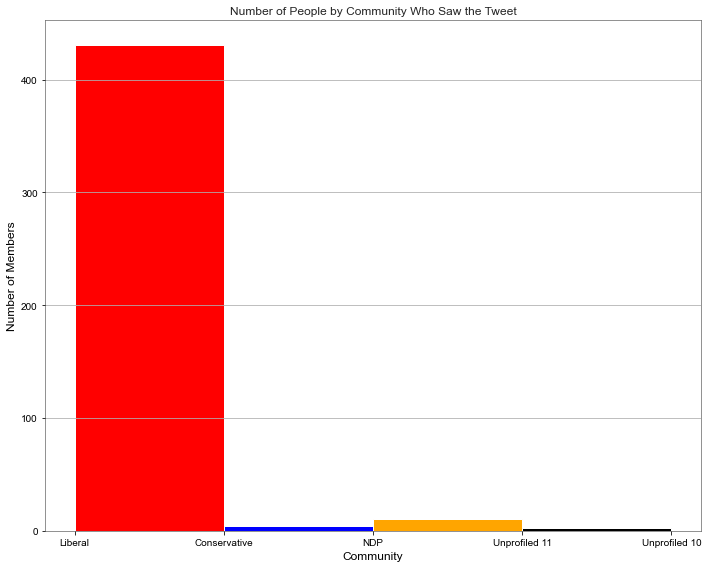

In [249]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(10, 8))
data = community_info["community"].to_numpy()

N, bins, patches = ax.hist(data, edgecolor='white', bins=4, linewidth=1)


patches[0].set_facecolor('red')
patches[1].set_facecolor('blue')
patches[2].set_facecolor('orange')
patches[3].set_facecolor('black')

plt.xlabel("Community")
plt.ylabel("Number of Members")
plt.grid(axis='y')
plt.title(label="Number of People by Community Who Saw the Tweet")
#bins_labels(bins, fontsize=20)

plt.show()

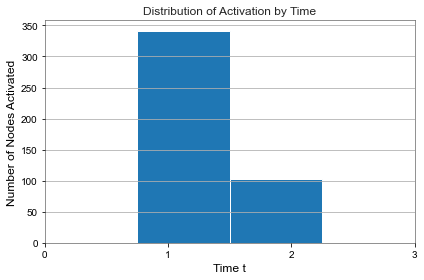

In [259]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(6, 4
                               ))
data = community_info["average_activation_time"].to_numpy()

N, bins, patches = ax.hist(data, edgecolor='white', bins=4, linewidth=1 , density=False)
plt.xlabel("Time t")
plt.ylabel("Number of Nodes Activated")
plt.grid(axis='y')
plt.title(label="Distribution of Activation by Time")
ax.set(xticks=range(4), xlim=[0, 3])

plt.show()

https://stackoverflow.com/questions/23246125/how-to-center-labels-in-histogram-plot/23246992

https://www.tutorialspoint.com/how-to-plot-a-line-graph-from-histogram-data-in-matplotlib

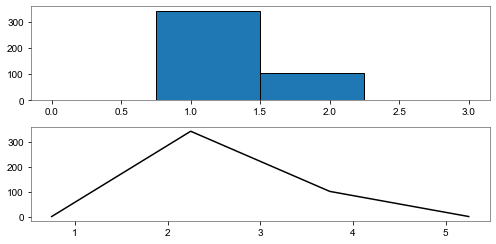

In [252]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.subplot(211)
data = experiments_df['average_activation_time'].tolist()
y, binEdges = np.histogram(data, bins=4)
plt.hist(data, bins=4, edgecolor='black')
plt.subplot(212)
bincenters = (binEdges[1:] + binEdges[:-1])
plt.plot(bincenters, y, '-', c='black')
plt.show()

In [253]:
experiments_df['average_activation_time'].to_csv("liberal_Information_Cascade.csv")

### Looking for Notable Nodes 

Notable Nodes Are:

In [ ]:
diversly_retweeted = [215632349, 196717787]

In [ ]:
diversly_retweeting = [596787864, 12034642, 711980580813066240]

In [ ]:
high_undirected_betweenness_retweeters = [16272844]

### Conservative Experiment

In [145]:
len(activation_community_groups.get_group("Conservative")['id'].tolist())

18

In [148]:
conservative_starters = random.sample(activation_community_groups.get_group("Conservative")['id'].tolist(), 2)

In [149]:
conservative_starters

[1086084557009575936, 989311745100566529]

^ These are the starting nodes ^

In [150]:
t5_conservative = information_cascade(G,5,conservative_starters)

In [152]:
experiments_conservative = []
for i in range(1,1000):
    t5 = information_cascade(G,5,conservative_starters)
    experiment = pd.DataFrame.from_dict(t5, orient='index',
                       columns=[ "activation_time_exp_{}".format(i)])
    experiments_conservative.append(experiment)

In [168]:
experiments_conservative_df = experiments_conservative[0]

for i in range (1, 999):
    experiments_conservative_df = pd.merge(experiments_conservative[i], experiments_conservative_df, left_index=True, right_index=True, how='outer')

In [169]:
experiments_conservative_df['average_activation_time'] = experiments_conservative_df.mean(axis=1)
experiments_conservative_df['average_activation_time'] = experiments_conservative_df['average_activation_time'].apply(np.floor)

In [170]:
experiments_conservative_df.describe()

,activation_time_exp_999,activation_time_exp_998,activation_time_exp_997,activation_time_exp_996,activation_time_exp_995,activation_time_exp_994,activation_time_exp_993,activation_time_exp_992,activation_time_exp_991,activation_time_exp_990,...,activation_time_exp_9,activation_time_exp_8,activation_time_exp_7,activation_time_exp_6,activation_time_exp_5,activation_time_exp_4,activation_time_exp_3,activation_time_exp_2,activation_time_exp_1,average_activation_time
count,3.000000,5.000000,4.00000,3.000000,3.000000,5.000000,3.000000,4.00000,4.00000,3.000000,...,4.00000,3.000000,6.000000,8.00000,4.00000,7.000000,5.000000,3.000000,5.000000,155.000000
mean,0.333333,0.600000,0.50000,0.333333,0.333333,0.600000,0.333333,0.50000,0.50000,0.333333,...,0.50000,0.333333,0.666667,0.75000,0.50000,0.714286,0.600000,0.333333,0.600000,1.193548
std,0.577350,0.547723,0.57735,0.577350,0.577350,0.547723,0.577350,0.57735,0.57735,0.577350,...,0.57735,0.577350,0.516398,0.46291,0.57735,0.487950,0.547723,0.577350,0.547723,0.427873
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,...,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,...,0.00000,0.000000,0.250000,0.75000,0.00000,0.500000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,1.000000,0.50000,0.000000,0.000000,1.000000,0.000000,0.50000,0.50000,0.000000,...,0.50000,0.000000,1.000000,1.00000,0.50000,1.000000,1.000000,0.000000,1.000000,1.000000
75%,0.500000,1.000000,1.00000,0.500000,0.500000,1.000000,0.500000,1.00000,1.00000,0.500000,...,1.00000,0.500000,1.000000,1.00000,1.00000,1.000000,1.000000,0.500000,1.000000,1.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,...,1.00000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,2.000000


This shows that the maxiumum steps needed after a 1000 tries of diffusing the information was 2

In [172]:
experiments_conservative_df['average_activation_time']

16386816               1.0
18828362               1.0
19611940               1.0
24558868               2.0
25040040               1.0
                      ... 
1432545138119675905    1.0
1434567543948300290    2.0
1438670371427917832    1.0
1440509126216347656    1.0
1446352422272528385    1.0
Name: average_activation_time, Length: 155, dtype: float64

Perform An Inner Join on the nodes and the experiments to get community information

In [173]:
community_info_conservative = pd.merge(experiments_conservative_df['average_activation_time'], nodes, left_index=True, right_on="Id")

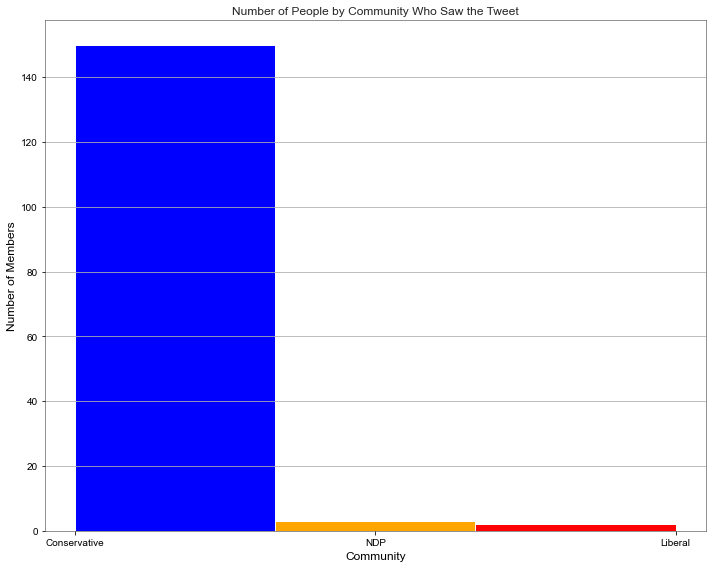

In [175]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(10, 8))
data = community_info_conservative["community"].to_numpy()

N, bins, patches = ax.hist(data, edgecolor='white', bins=3, linewidth=1)


patches[0].set_facecolor('blue')
patches[1].set_facecolor('orange')
patches[2].set_facecolor('red')


plt.xlabel("Community")
plt.ylabel("Number of Members")
plt.grid(axis='y')
plt.title(label="Number of People by Community Who Saw the Tweet")
#bins_labels(bins, fontsize=20)

plt.show()

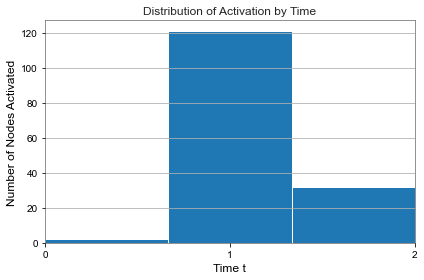

In [260]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(6, 4
                               ))
data = experiments_conservative_df["average_activation_time"].to_numpy()

N, bins, patches = ax.hist(data, edgecolor='white', bins=3, linewidth=1 , density=False)
plt.xlabel("Time t")
plt.ylabel("Number of Nodes Activated")
plt.grid(axis='y')
plt.title(label="Distribution of Activation by Time")
ax.set(xticks=range(3), xlim=[0, 2])

plt.show()

https://stackoverflow.com/questions/23246125/how-to-center-labels-in-histogram-plot/23246992

https://www.tutorialspoint.com/how-to-plot-a-line-graph-from-histogram-data-in-matplotlib

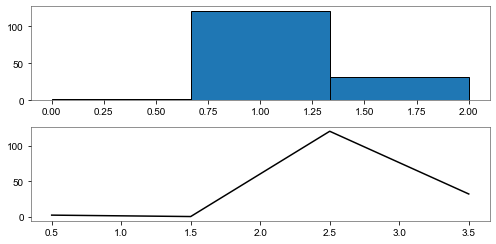

In [179]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.subplot(211)
data = experiments_conservative_df['average_activation_time'].tolist()
y, binEdges = np.histogram(data, bins=4)
plt.hist(data, bins=3, edgecolor='black')
plt.subplot(212)
bincenters = (binEdges[1:] + binEdges[:-1])
plt.plot(bincenters, y, '-', c='black')
plt.show()

In [180]:
experiments_conservative_df['average_activation_time'].to_csv("Conservative_Information_Cascade.csv")

### NDP Experiment

In [181]:
len(activation_community_groups.get_group("NDP")['id'].tolist())

9

In [182]:
ndp_starters = random.sample(activation_community_groups.get_group("NDP")['id'].tolist(), 2)

In [183]:
ndp_starters

[2715275551, 196717787]

^ These are the starting nodes ^

In [184]:
t5_ndp = information_cascade(G,5,ndp_starters)

In [185]:
experiments_ndp = []
for i in range(1,1000):
    t5 = information_cascade(G,5,ndp_starters)
    experiment = pd.DataFrame.from_dict(t5, orient='index',
                       columns=[ "activation_time_exp_{}".format(i)])
    experiments_ndp.append(experiment)

In [186]:
experiments_ndp_df = experiments_ndp[0]

for i in range (1, 999):
    experiments_ndp_df = pd.merge(experiments_ndp[i], experiments_ndp_df, left_index=True, right_index=True, how='outer')

In [187]:
experiments_ndp_df['average_activation_time'] = experiments_ndp_df.mean(axis=1)
experiments_ndp_df['average_activation_time'] = experiments_ndp_df['average_activation_time'].apply(np.floor)

In [188]:
experiments_ndp_df.describe()

,activation_time_exp_999,activation_time_exp_998,activation_time_exp_997,activation_time_exp_996,activation_time_exp_995,activation_time_exp_994,activation_time_exp_993,activation_time_exp_992,activation_time_exp_991,activation_time_exp_990,...,activation_time_exp_9,activation_time_exp_8,activation_time_exp_7,activation_time_exp_6,activation_time_exp_5,activation_time_exp_4,activation_time_exp_3,activation_time_exp_2,activation_time_exp_1,average_activation_time
count,6.000000,8.00000,7.000000,11.000000,9.000000,6.000000,5.000000,10.000000,4.00000,8.00000,...,4.00000,5.000000,8.00000,7.000000,3.000000,12.000000,5.000000,7.000000,6.000000,340.000000
mean,0.666667,0.75000,0.714286,1.000000,0.777778,0.666667,0.600000,0.800000,0.50000,0.75000,...,0.50000,0.600000,0.75000,0.714286,0.333333,1.166667,0.600000,0.714286,0.666667,1.432353
std,0.516398,0.46291,0.487950,0.632456,0.440959,0.516398,0.547723,0.421637,0.57735,0.46291,...,0.57735,0.547723,0.46291,0.487950,0.577350,0.717741,0.547723,0.487950,0.516398,0.507885
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.75000,0.500000,1.000000,1.000000,0.250000,0.000000,1.000000,0.00000,0.75000,...,0.00000,0.000000,0.75000,0.500000,0.000000,1.000000,0.000000,0.500000,0.250000,1.000000
50%,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.50000,1.00000,...,0.50000,1.000000,1.00000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,...,1.00000,1.000000,1.00000,1.000000,0.500000,2.000000,1.000000,1.000000,1.000000,2.000000
max,1.000000,1.00000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,...,1.00000,1.000000,1.00000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000


This shows that the maxiumum steps needed after a 1000 tries of diffusing the information was 2

In [189]:
experiments_ndp_df['average_activation_time']

3258511                1.0
9356072                1.0
14265343               2.0
14422995               2.0
14501713               1.0
                      ... 
1423258513665581061    2.0
1430883215439540230    2.0
1432592905055653889    1.0
1436412482386550784    1.0
1439240496921161733    1.0
Name: average_activation_time, Length: 340, dtype: float64

Perform An Inner Join on the nodes and the experiments to get community information

In [190]:
community_info_ndp = pd.merge(experiments_ndp_df['average_activation_time'], nodes, left_index=True, right_on="Id")

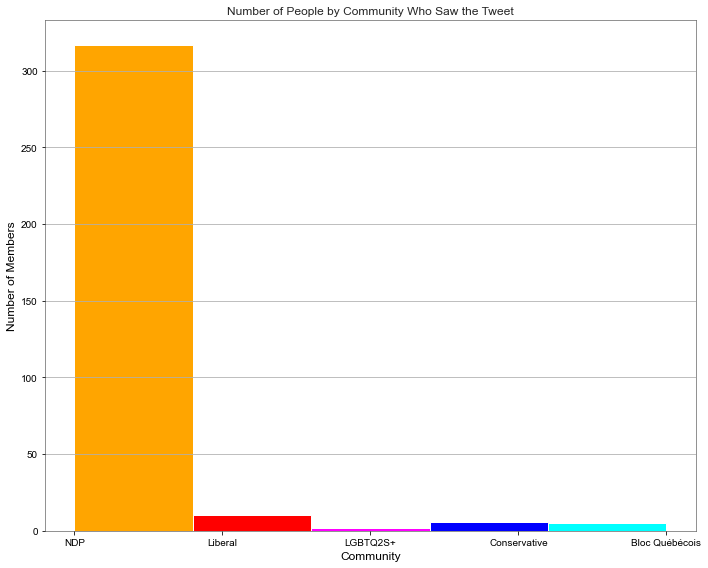

In [195]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(10, 8))
data = community_info_ndp["community"].to_numpy()

N, bins, patches = ax.hist(data, edgecolor='white', bins=5, linewidth=1)


patches[0].set_facecolor('orange')
patches[1].set_facecolor('red')
patches[2].set_facecolor('magenta')
patches[3].set_facecolor('blue')
patches[4].set_facecolor('cyan')

plt.xlabel("Community")
plt.ylabel("Number of Members")
plt.grid(axis='y')
plt.title(label="Number of People by Community Who Saw the Tweet")
#bins_labels(bins, fontsize=20)

plt.show()

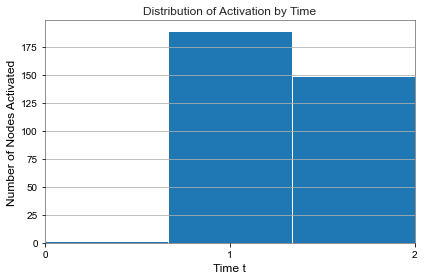

In [256]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(6, 4
                               ))
data = experiments_ndp_df["average_activation_time"].to_numpy()

N, bins, patches = ax.hist(data, edgecolor='white', bins=3, linewidth=1 , density=False)
plt.xlabel("Time t")
plt.ylabel("Number of Nodes Activated")
plt.grid(axis='y')
plt.title(label="Distribution of Activation by Time")
ax.set(xticks=range(3), xlim=[0, 2])

plt.show()

https://stackoverflow.com/questions/23246125/how-to-center-labels-in-histogram-plot/23246992

https://www.tutorialspoint.com/how-to-plot-a-line-graph-from-histogram-data-in-matplotlib

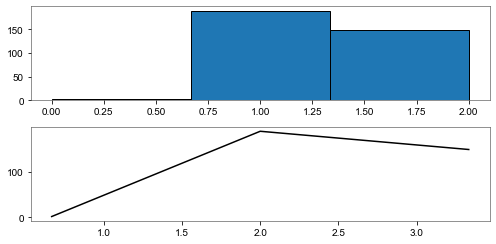

In [200]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.subplot(211)
data = experiments_ndp_df['average_activation_time'].tolist()
y, binEdges = np.histogram(data, bins=3)
plt.hist(data, bins=3, edgecolor='black')
plt.subplot(212)
bincenters = (binEdges[1:] + binEdges[:-1])
plt.plot(bincenters, y, '-', c='black')
plt.show()

In [201]:
experiments_ndp_df['average_activation_time'].to_csv("NDP_Information_Cascade.csv")

### LGBTQS+ Experiment

In [202]:
len(activation_community_groups.get_group("LGBTQ2S+")['id'].tolist())

2

In [203]:
LGBTQ2S_starters = random.sample(activation_community_groups.get_group("LGBTQ2S+")['id'].tolist(), 2)

In [204]:
LGBTQ2S_starters

[294660973, 119925381]

^ These are the starting nodes ^

In [205]:
t5_LGBTQ2S = information_cascade(G,5,LGBTQ2S_starters)

In [206]:
experiments_LGBTQ2S = []
for i in range(1,1000):
    t5 = information_cascade(G,5,LGBTQ2S_starters)
    experiment = pd.DataFrame.from_dict(t5, orient='index',
                       columns=[ "activation_time_exp_{}".format(i)])
    experiments_LGBTQ2S.append(experiment)

In [207]:
experiments_LGBTQ2S_df = experiments_LGBTQ2S[0]

for i in range (1, 999):
    experiments_LGBTQ2S_df = pd.merge(experiments_LGBTQ2S[i], experiments_LGBTQ2S_df, left_index=True, right_index=True, how='outer')

In [208]:
experiments_LGBTQ2S_df['average_activation_time'] = experiments_LGBTQ2S_df.mean(axis=1)
experiments_LGBTQ2S_df['average_activation_time'] = experiments_LGBTQ2S_df['average_activation_time'].apply(np.floor)

In [209]:
experiments_LGBTQ2S_df.describe()

,activation_time_exp_999,activation_time_exp_998,activation_time_exp_997,activation_time_exp_996,activation_time_exp_995,activation_time_exp_994,activation_time_exp_993,activation_time_exp_992,activation_time_exp_991,activation_time_exp_990,...,activation_time_exp_9,activation_time_exp_8,activation_time_exp_7,activation_time_exp_6,activation_time_exp_5,activation_time_exp_4,activation_time_exp_3,activation_time_exp_2,activation_time_exp_1,average_activation_time
count,5.000000,6.000000,6.000000,2.0,4.00000,3.000000,8.00000,5.000000,7.000000,4.00000,...,4.00000,10.000000,8.00000,3.000000,5.000000,12.000000,4.00000,5.000000,6.000000,189.000000
mean,0.600000,0.666667,0.666667,0.0,0.50000,0.333333,0.75000,0.600000,0.714286,0.50000,...,0.50000,0.800000,0.75000,0.333333,0.600000,0.833333,0.50000,0.600000,0.666667,1.084656
std,0.547723,0.516398,0.516398,0.0,0.57735,0.577350,0.46291,0.547723,0.487950,0.57735,...,0.57735,0.421637,0.46291,0.577350,0.547723,0.389249,0.57735,0.547723,0.516398,0.314926
min,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.250000,0.0,0.00000,0.000000,0.75000,0.000000,0.500000,0.00000,...,0.00000,1.000000,0.75000,0.000000,0.000000,1.000000,0.00000,0.000000,0.250000,1.000000
50%,1.000000,1.000000,1.000000,0.0,0.50000,0.000000,1.00000,1.000000,1.000000,0.50000,...,0.50000,1.000000,1.00000,0.000000,1.000000,1.000000,0.50000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.0,1.00000,0.500000,1.00000,1.000000,1.000000,1.00000,...,1.00000,1.000000,1.00000,0.500000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,0.0,1.00000,1.000000,1.00000,1.000000,1.000000,1.00000,...,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,2.000000


This shows that the maxiumum steps needed after a 1000 tries of diffusing the information was 2

In [210]:
experiments_LGBTQ2S_df['average_activation_time']

7491592                1.0
14221144               1.0
16267310               1.0
16811701               1.0
17174462               2.0
                      ... 
1390067256080621568    1.0
1393384383650975744    1.0
1396338835596795904    1.0
1416921060788801539    2.0
1437800221375963143    1.0
Name: average_activation_time, Length: 189, dtype: float64

Perform An Inner Join on the nodes and the experiments to get community information

In [211]:
community_info_LGBTQ2S = pd.merge(experiments_LGBTQ2S_df['average_activation_time'], nodes, left_index=True, right_on="Id")

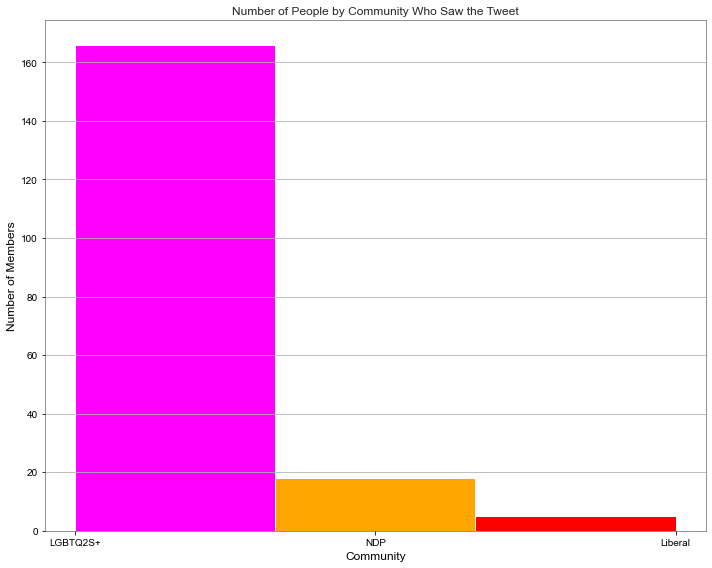

In [214]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(10, 8))
data = community_info_LGBTQ2S["community"].to_numpy()

N, bins, patches = ax.hist(data, edgecolor='white', bins=3, linewidth=1)


patches[0].set_facecolor('magenta')
patches[1].set_facecolor('orange')
patches[2].set_facecolor('red')


plt.xlabel("Community")
plt.ylabel("Number of Members")
plt.grid(axis='y')
plt.title(label="Number of People by Community Who Saw the Tweet")
#bins_labels(bins, fontsize=20)

plt.show()

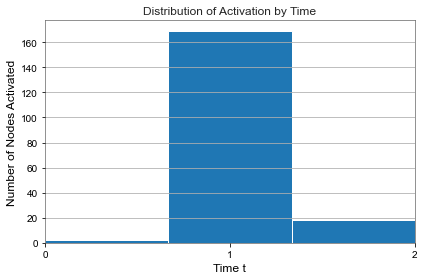

In [257]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(6, 4
                               ))
data = experiments_LGBTQ2S_df["average_activation_time"].to_numpy()

N, bins, patches = ax.hist(data, edgecolor='white', bins=3, linewidth=1 , density=False)
plt.xlabel("Time t")
plt.ylabel("Number of Nodes Activated")
plt.grid(axis='y')
plt.title(label="Distribution of Activation by Time")
ax.set(xticks=range(3), xlim=[0, 2])

plt.show()

https://stackoverflow.com/questions/23246125/how-to-center-labels-in-histogram-plot/23246992

https://www.tutorialspoint.com/how-to-plot-a-line-graph-from-histogram-data-in-matplotlib

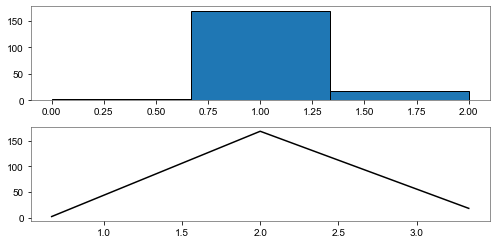

In [216]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.subplot(211)
data = experiments_LGBTQ2S_df['average_activation_time'].tolist()
y, binEdges = np.histogram(data, bins=3)
plt.hist(data, bins=3, edgecolor='black')
plt.subplot(212)
bincenters = (binEdges[1:] + binEdges[:-1])
plt.plot(bincenters, y, '-', c='black')
plt.show()

In [217]:
experiments_LGBTQ2S_df['average_activation_time'].to_csv("LGBTQ2S_Information_Cascade.csv")

### Bloc Québécois Experiment

In [218]:
len(activation_community_groups.get_group("Bloc Québécois")['id'].tolist())

13

In [219]:
Bloc_starters = random.sample(activation_community_groups.get_group("Bloc Québécois")['id'].tolist(), 2)

In [220]:
Bloc_starters

[1063494232126689280, 16014404]

^ These are the starting nodes ^

In [223]:
t5_Bloc = information_cascade(G,5,Bloc_starters)

In [224]:
experiments_Bloc = []
for i in range(1,1000):
    t5 = information_cascade(G,5,Bloc_starters)
    experiment = pd.DataFrame.from_dict(t5, orient='index',
                       columns=[ "activation_time_exp_{}".format(i)])
    experiments_Bloc.append(experiment)

In [225]:
experiments_Bloc_df = experiments_Bloc[0]

for i in range (1, 999):
    experiments_Bloc_df = pd.merge(experiments_Bloc[i], experiments_Bloc_df, left_index=True, right_index=True, how='outer')

In [226]:
experiments_Bloc_df['average_activation_time'] = experiments_Bloc_df.mean(axis=1)
experiments_Bloc_df['average_activation_time'] = experiments_Bloc_df['average_activation_time'].apply(np.floor)

In [227]:
experiments_Bloc_df.describe()

,activation_time_exp_999,activation_time_exp_998,activation_time_exp_997,activation_time_exp_996,activation_time_exp_995,activation_time_exp_994,activation_time_exp_993,activation_time_exp_992,activation_time_exp_991,activation_time_exp_990,...,activation_time_exp_9,activation_time_exp_8,activation_time_exp_7,activation_time_exp_6,activation_time_exp_5,activation_time_exp_4,activation_time_exp_3,activation_time_exp_2,activation_time_exp_1,average_activation_time
count,6.000000,8.00000,12.000000,12.000000,2.0,4.00000,7.000000,4.00000,4.00000,5.000000,...,7.000000,7.000000,8.00000,7.000000,7.000000,6.000000,8.00000,5.000000,6.000000,230.000000
mean,0.666667,0.75000,0.833333,0.833333,0.0,0.50000,0.714286,0.50000,0.50000,0.600000,...,0.714286,0.714286,0.75000,0.714286,0.714286,0.666667,0.75000,0.600000,0.666667,1.182609
std,0.516398,0.46291,0.389249,0.389249,0.0,0.57735,0.487950,0.57735,0.57735,0.547723,...,0.487950,0.487950,0.46291,0.487950,0.487950,0.516398,0.46291,0.547723,0.516398,0.449796
min,0.000000,0.00000,0.000000,0.000000,0.0,0.00000,0.000000,0.00000,0.00000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.250000,0.75000,1.000000,1.000000,0.0,0.00000,0.500000,0.00000,0.00000,0.000000,...,0.500000,0.500000,0.75000,0.500000,0.500000,0.250000,0.75000,0.000000,0.250000,1.000000
50%,1.000000,1.00000,1.000000,1.000000,0.0,0.50000,1.000000,0.50000,0.50000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000
75%,1.000000,1.00000,1.000000,1.000000,0.0,1.00000,1.000000,1.00000,1.00000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000
max,1.000000,1.00000,1.000000,1.000000,0.0,1.00000,1.000000,1.00000,1.00000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,3.000000


This shows that the maxiumum steps needed after a 1000 tries of diffusing the information was 3

In [228]:
experiments_Bloc_df['average_activation_time']

12220452               1.0
16014404               0.0
16213179               2.0
16450356               1.0
17721863               1.0
                      ... 
1435677654699675654    3.0
1437734637531504644    1.0
1439240496921161733    1.0
1440532151582134272    1.0
1440664285210767367    1.0
Name: average_activation_time, Length: 230, dtype: float64

Perform An Inner Join on the nodes and the experiments to get community information

In [229]:
community_info_Bloc = pd.merge(experiments_Bloc_df['average_activation_time'], nodes, left_index=True, right_on="Id")

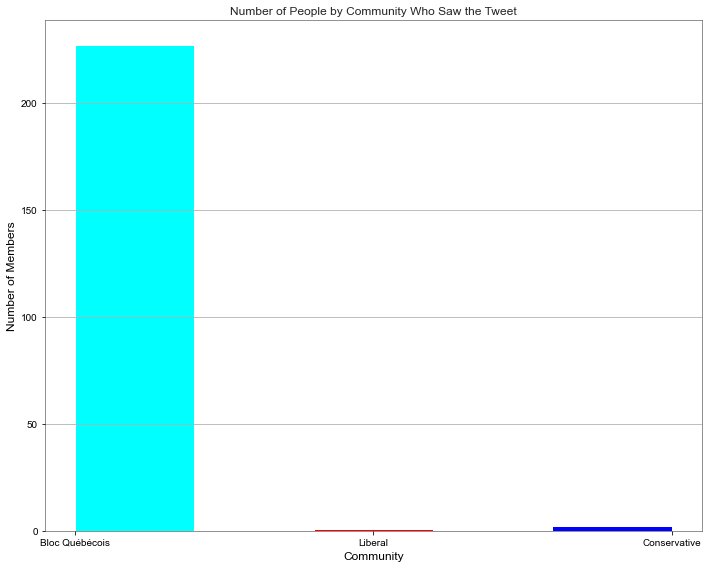

In [232]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(10, 8))
data = community_info_Bloc["community"].to_numpy()

N, bins, patches = ax.hist(data, edgecolor='white', bins=5, linewidth=1)


patches[0].set_facecolor('cyan')
patches[2].set_facecolor('red')
patches[4].set_facecolor('blue')


plt.xlabel("Community")
plt.ylabel("Number of Members")
plt.grid(axis='y')
plt.title(label="Number of People by Community Who Saw the Tweet")
#bins_labels(bins, fontsize=20)

plt.show()

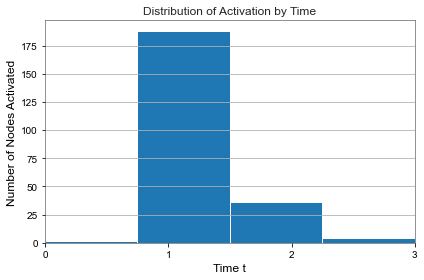

In [255]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(6, 4
                               ))
data = experiments_Bloc_df["average_activation_time"].to_numpy()

N, bins, patches = ax.hist(data, edgecolor='white', bins=4, linewidth=1 , density=False)
plt.xlabel("Time t")
plt.ylabel("Number of Nodes Activated")
plt.grid(axis='y')
plt.title(label="Distribution of Activation by Time")
ax.set(xticks=range(4), xlim=[0, 3])

plt.show()

https://stackoverflow.com/questions/23246125/how-to-center-labels-in-histogram-plot/23246992

https://www.tutorialspoint.com/how-to-plot-a-line-graph-from-histogram-data-in-matplotlib

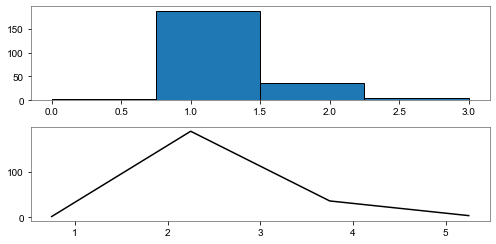

In [235]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.subplot(211)
data = experiments_Bloc_df['average_activation_time'].tolist()
y, binEdges = np.histogram(data, bins=4)
plt.hist(data, bins=4, edgecolor='black')
plt.subplot(212)
bincenters = (binEdges[1:] + binEdges[:-1])
plt.plot(bincenters, y, '-', c='black')
plt.show()

In [236]:
experiments_Bloc_df['average_activation_time'].to_csv("Bloc_Information_Cascade.csv")